# Measure spectral indices from mid-infrared spectra

Measure the depth of the water, methane, ammonia, and silicates in the mid-infrared spectra of ultracool objects.

In [1]:
import spectral_indices
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from astropy.io import ascii

In [24]:
import seda


    SEDA package imported


# Silicates and water absorptions

Read Spitzer IRS spectrum for the L6 dwarf 2MASS J21481628+4003593

This spectrum has a strong silicate absorption at 9.3 microns and prominent water absorption at 6.25 microns.

In [3]:
IRS = ascii.read('../2148+4003_IRS_spectrum.dat')
wl_2148 = IRS['wl(um)'] # in um
flux_2148 = IRS['flux(Jy)'] # in Jy
eflux_2148 = IRS['eflux(Jy)'] # in Jy

Plot the spectrum

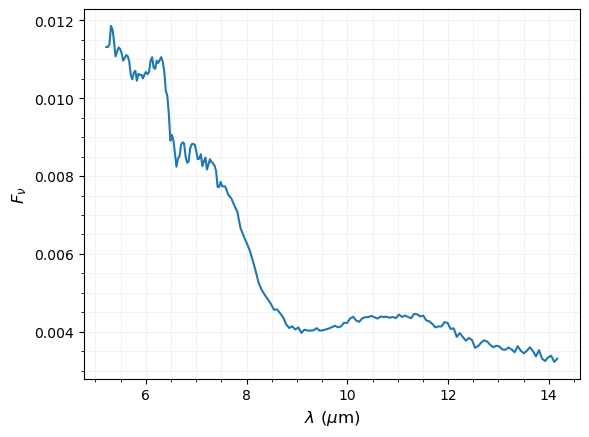

In [4]:
fig, ax = plt.subplots()

plt.plot(wl_2148, flux_2148)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both', color='gainsboro', linewidth=0.5, alpha=0.5)

plt.xlabel(r'$\lambda\ (\mu$m)', size=12)
plt.ylabel(r'$F_\nu$', size=12)

plt.show()

Measure the silicate index, show the results, and save the figure.

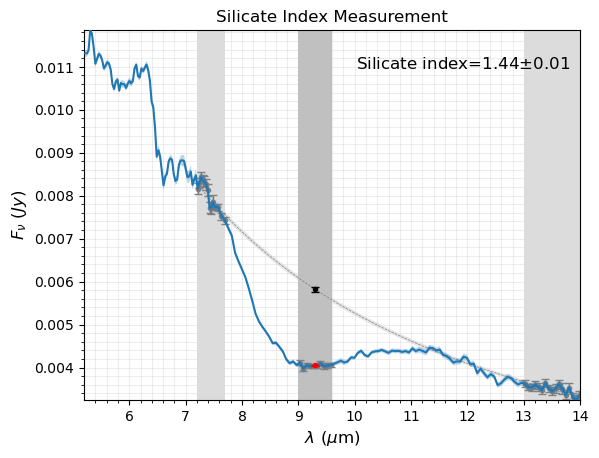

In [14]:
import importlib
importlib.reload(spectral_indices)
import numpy as np

out_silicate_index = spectral_indices.silicate_index(wl_2148, flux_2148, eflux_2148, 
                                                     plot=True, plot_save=True)

In [22]:
mask_SNR = (wl_2148>10.9) & (wl_2148<11.1)
median_SNR = np.median(flux_2148[mask_SNR]/eflux_2148[mask_SNR])
median_SNR

73.57029730480689

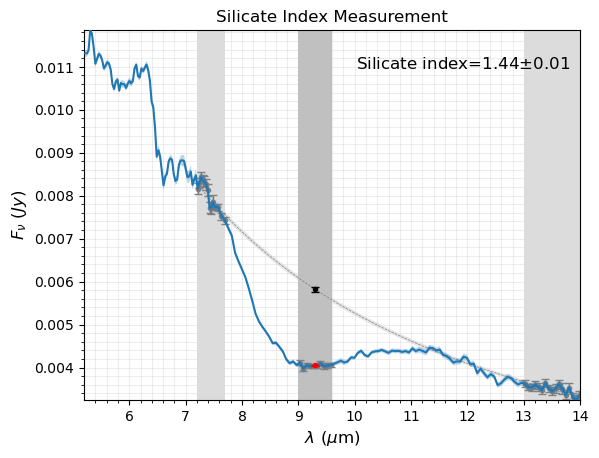

In [23]:
# import importlib
# importlib.reload(spectral_indices)
out_silicate_index = spectral_indices.silicate_index(wl_2148, flux_2148, eflux_2148, 
                                                     plot=True, plot_save=True)

To see more information about the available input paramters by silicate_index uncomment the following command:

In [5]:
#help(spectral_indices.silicate_index)

Extract relevant parameters from the output dictionary

In [6]:
silicate_index = out_silicate_index['silicate_index'] # silicate index
esilicate_index = out_silicate_index['esilicate_index'] # silicate index error
print(f'silicate index = {round(silicate_index,2)}+-{round(esilicate_index,2)}')

silicate index = 1.44+-0.01


Measure the water index, show the results, and save the figure.

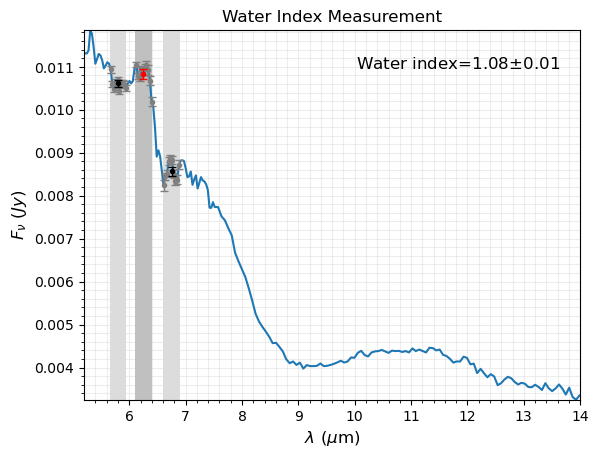

In [7]:
# import importlib
# importlib.reload(spectral_indices)
out_water_index = spectral_indices.water_index(wl_2148, flux_2148, eflux_2148, 
                                               plot=True, plot_save=True)

Extract relevant parameters from the output dictionary

In [8]:
water_index = out_water_index['water_index'] # water index
ewater_index = out_water_index['ewater_index'] # water index uncertainty
print(f'water index = {round(water_index,2)}+-{round(ewater_index,2)}')

water index = 1.08+-0.01


# Methane and ammonia absorptions

Read Spitzer IRS spectrum for the T8 dwarf 2MASS J04151954-0935066.

This spectrum has strong absorptions by methane at 7.65 microns and ammonia at 6.25 microns.

In [9]:
IRS = ascii.read('0415-0935_IRS_spectrum.dat')
wl_0415 = IRS['wl(um)'] # in um
flux_0415 = IRS['flux(Jy)'] # in Jy
eflux_0415 = IRS['eflux(Jy)'] # in Jy

Plot the spectrum

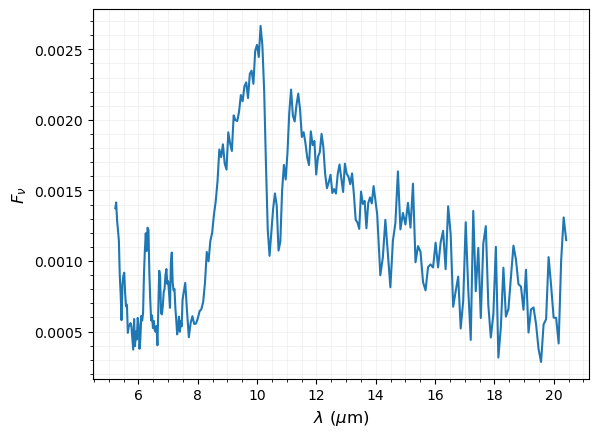

In [10]:
fig, ax = plt.subplots()

plt.plot(wl_0415, flux_0415)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(True, which='both', color='gainsboro', linewidth=0.5, alpha=0.5)

plt.xlabel(r'$\lambda\ (\mu$m)', size=12)
plt.ylabel(r'$F_\nu$', size=12)

plt.show()

Measure the methane index, show the results, and save the figure.

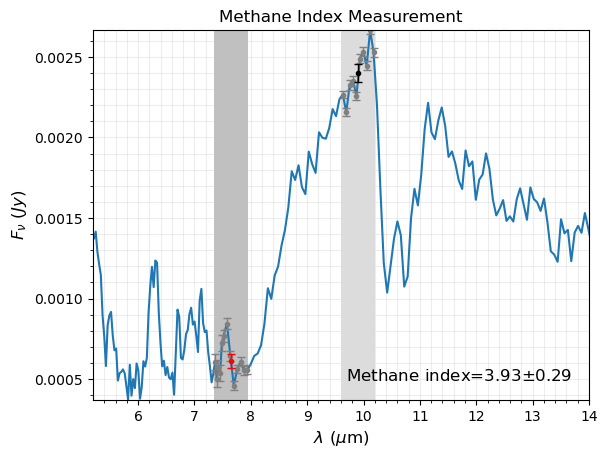

In [11]:
# import importlib
# importlib.reload(spectral_indices)
out_methane_index = spectral_indices.methane_index(wl_0415, flux_0415, eflux_0415, 
                                                   plot=True, plot_save=True)

Extract relevant parameters from the output dictionary

In [12]:
methane_index = out_methane_index['methane_index'] # methane index
emethane_index = out_methane_index['emethane_index'] # methane index uncertainty
print(f'methane index = {round(methane_index,2)}+-{round(emethane_index,2)}')

methane index = 3.93+-0.29


Measure the ammoni index, show the results, and save the figure.

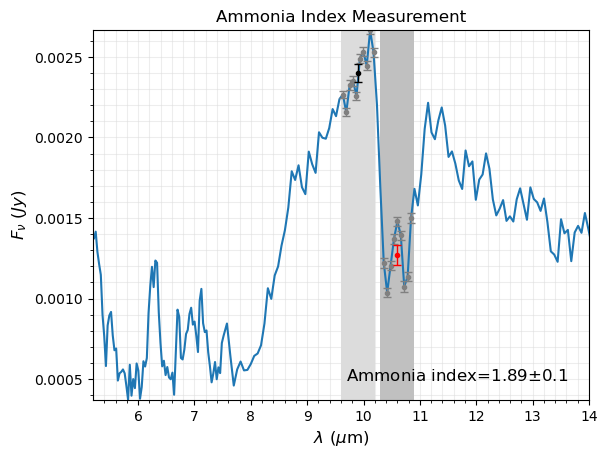

In [13]:
import importlib
importlib.reload(spectral_indices)
out_ammonia_index = spectral_indices.ammonia_index(wl_0415, flux_0415, eflux_0415,
                                                   plot=True, plot_save=True)

Extract relevant parameters from the output dictionary

In [14]:
ammonia_index = out_ammonia_index['ammonia_index'] # ammonia index
eammonia_index = out_ammonia_index['eammonia_index'] # ammonia index uncertainty
print(f'ammonia index = {round(ammonia_index,2)}+-{round(eammonia_index,2)}')

ammonia index = 1.89+-0.1
